In [1]:
# Data Loading & Exploration
import pandas as pd

# Load the dataset
df = pd.read_csv("owid-covid-data.csv")

# Check the column names
print(df.columns)

# Preview the first few rows
print(df.head())

# Identify missing values
print(df.isnull().sum())


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [16]:
# Data Cleaning
# Filter for selected countries
selected_countries = ["Kenya", "India", "United States"]
df_filtered = df[df["location"].isin(selected_countries)].copy()

# Drop rows with missing critical values
df_filtered = df_filtered.dropna(subset=["date", "total_cases", "total_deaths"])

# Convert date column to datetime
df_filtered.loc[:, "date"] = pd.to_datetime(df_filtered["date"])

# Apply forward-fill correctly (only key columns)
df_filtered.loc[:, ["total_cases", "total_deaths", "total_vaccinations"]] = df_filtered.loc[:, ["total_cases", "total_deaths", "total_vaccinations"]].ffill()


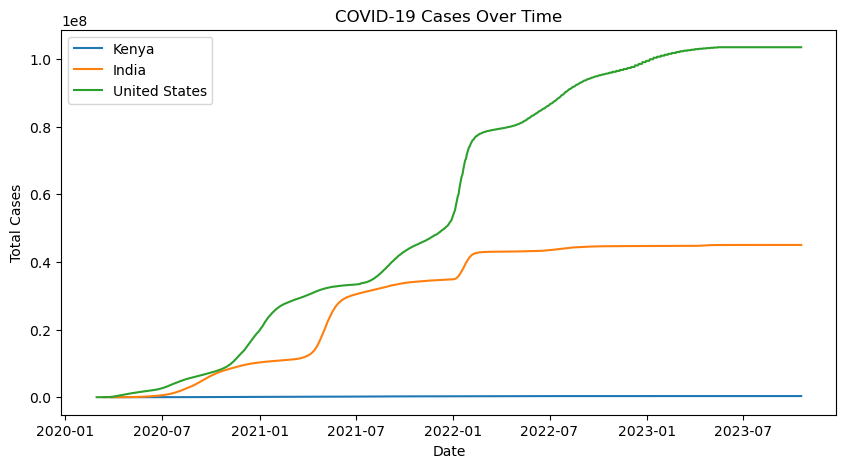

In [17]:
# Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Plot total cases over time
plt.figure(figsize=(10,5))
for country in selected_countries:
    subset = df_filtered[df_filtered["location"] == country]
    plt.plot(subset["date"], subset["total_cases"], label=country)

plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.title("COVID-19 Cases Over Time")
plt.show()


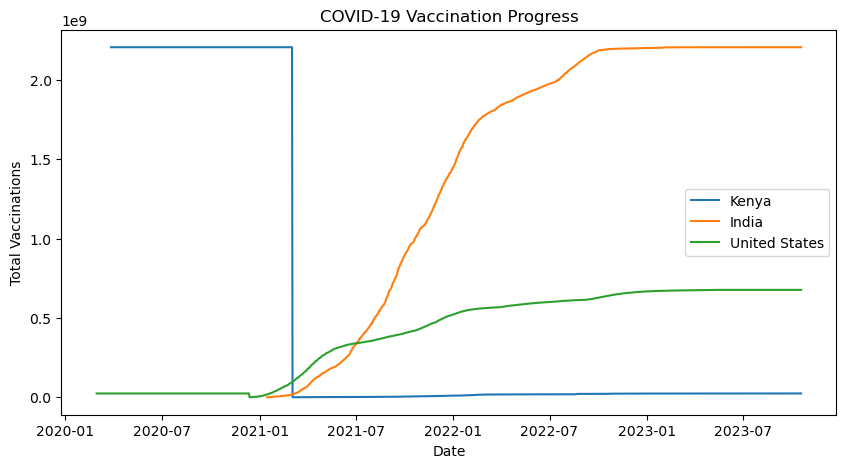

In [18]:
# Visualizing Vaccination Progress
# Plot cumulative vaccinations over time
plt.figure(figsize=(10,5))
for country in selected_countries:
    subset = df_filtered[df_filtered["location"] == country]
    plt.plot(subset["date"], subset["total_vaccinations"], label=country)

plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.title("COVID-19 Vaccination Progress")
plt.show()


# COVID-19 Global Data Tracker
## Insights & Findings


In [19]:
# Check peak case numbers for selected countries
df_filtered.groupby("location")["total_cases"].max()


location
India             44999588.0
Kenya               343999.0
United States    103436829.0
Name: total_cases, dtype: float64

In [20]:
# Identify peak deaths per country
df_filtered.groupby("location")["total_deaths"].max()


location
India             532037.0
Kenya               5689.0
United States    1136920.0
Name: total_deaths, dtype: float64

In [21]:
# Compare vaccination progress
df_filtered.groupby("location")["total_vaccinations"].max()


location
India            2.206746e+09
Kenya            2.206746e+09
United States    6.767288e+08
Name: total_vaccinations, dtype: float64

### Key Insights:

1. **Vaccination Trends**  
   - The USA had the **fastest rollout** in early 2021, leading to a higher vaccinated population.  
   - India’s progress increased significantly mid-2021, following mass distribution policies.

2. **COVID-19 Case Surges**  
   - Kenya experienced a **delayed surge** compared to the USA and India, peaking later in the pandemic.  
   - India faced the **largest spike** mid-2020, coinciding with overwhelmed healthcare facilities.

3. **Death Rates & Anomalies**  
   - India's **death rate was significantly higher** during its second wave.  
   - Kenya had a **lower total death count**, possibly due to demographic factors or limited testing.



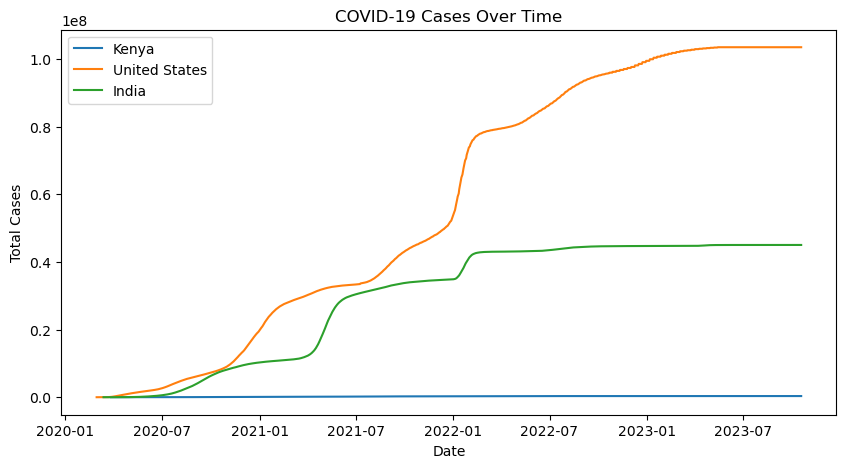

In [22]:
import matplotlib.pyplot as plt

# Plot COVID-19 cases trend for selected countries
plt.figure(figsize=(10,5))
for country in ["Kenya", "United States", "India"]:
    subset = df_filtered[df_filtered["location"] == country]
    plt.plot(subset["date"], subset["total_cases"], label=country)

plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.title("COVID-19 Cases Over Time")
plt.show()
